In [132]:
#importing required libraries

In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')


In [134]:
#read the dataset

In [135]:
df = pd.read_excel(r'measurements.xlsx')
print(df.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


In [136]:
#check null values

<Axes: >

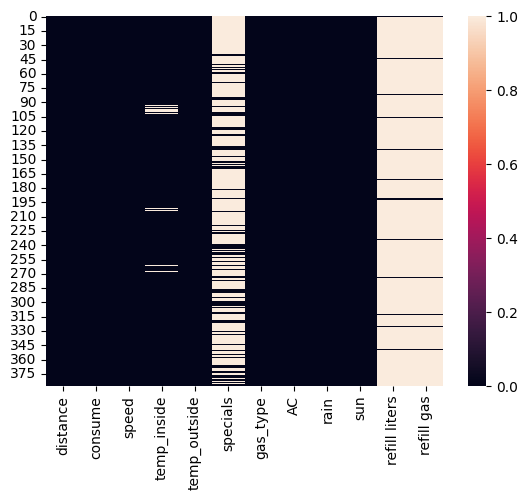

In [137]:
import seaborn as sns
sns.heatmap(df.isnull())

In [138]:
df.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


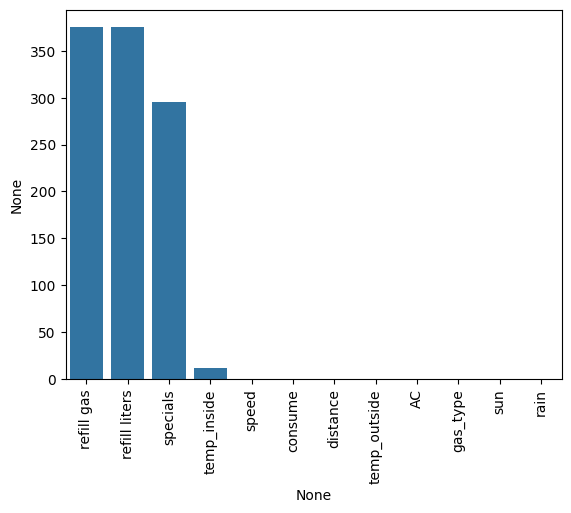

In [139]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(x=null_values.index,y=null_values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()

In [140]:
#removing null values

<Axes: >

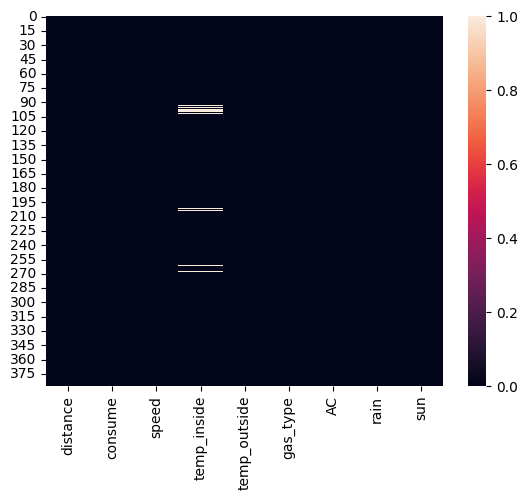

In [141]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [142]:
#handling null values

In [143]:
temp_inside_mean=np.mean(df['temp_inside'])

In [144]:
print(temp_inside_mean)

21.929521276595743


In [145]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

<Axes: >

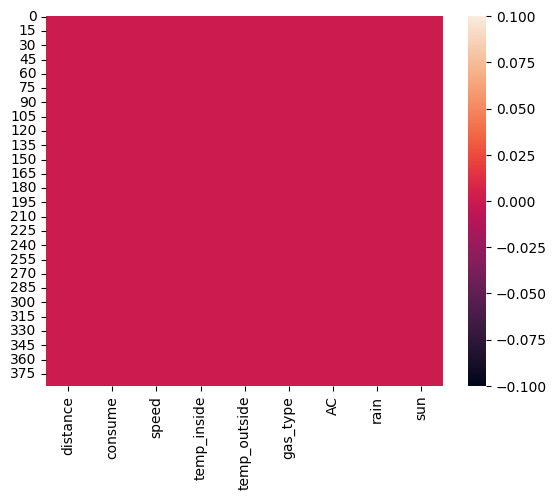

In [146]:
sns.heatmap(df.isnull())

In [147]:
#seperating independent and dependent variables

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [149]:
x=df.drop(['consume','gas_type'],axis=1)
y=df['consume']

In [150]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [151]:
x=x.values
y=y.values

In [152]:
#Splitting Data Into Train And Test

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [154]:
#Training The Model In Multiple Algorithms

In [155]:
#Linear Regression

In [156]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [157]:
x_train.shape

(271, 7)

In [158]:
y_pred = linReg.predict(x_test)
print(y_pred)

[4.74529019 5.28091233 5.11846572 5.18647684 4.56157009 5.94153804
 5.67791213 5.1875266  5.9184726  4.89999431 4.11401843 4.81816564
 6.55944917 4.54590356 5.15076404 5.27935583 5.56137799 5.17741341
 5.50606796 5.30926079 4.15432495 5.25542486 4.98292477 5.18492997
 4.91054992 4.83501281 4.6153078  4.22470594 5.13956507 3.94766814
 4.92771037 5.2418133  4.6973807  4.6029162  5.59025114 4.99367775
 4.60405314 4.05578834 5.13330389 6.09737077 4.43083181 5.24444636
 5.4076802  4.4752234  4.65430171 4.33884762 5.04636663 5.21386519
 4.98020461 4.9576386  4.81670463 5.45808593 5.40516957 5.22776237
 4.66457082 4.94235635 6.70676371 5.38773946 4.67134584 4.8131749
 5.45529103 4.87254016 4.59362312 4.75236474 4.39718117 4.71136158
 5.58965398 4.37456263 4.84902188 4.87653148 4.31628735 4.70226084
 5.22645747 4.91851878 5.13891317 4.8356652  5.3587681  5.06026165
 5.42171176 5.11770749 5.3043894  5.48641183 4.5122806  5.38935851
 5.74873692 4.46660014 5.55202065 5.78283986 5.11834712 4.61048

In [159]:
print(linReg.coef_,linReg.intercept_)

[ 0.00523674 -0.02371772 -0.14711979 -0.03724498  0.41456804  0.61676684
 -0.06407861] 9.389308142257129


In [160]:
accuracy = linReg.score(x_test,y_test)
print(accuracy)

0.1134733714697449


In [161]:
dum1 = pd.get_dummies(df['gas_type'])
print(dum1)

       E10   SP98
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
..     ...    ...
383  False   True
384  False   True
385  False   True
386  False   True
387  False   True

[388 rows x 2 columns]


In [162]:
df=pd.concat([df,dum1],axis=1)

In [163]:
df.drop(['gas_type'],axis=1,inplace=True)

In [164]:
x1=df.drop(['consume'],axis=1)

In [165]:
y1=df['consume']

In [166]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [167]:
x1=x1.values
y1=y1.values

In [168]:
x_train.shape

(271, 7)

In [169]:
x_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ])

In [170]:
#Lasso Regression model

In [171]:
lassoReg = linear_model.Lasso(alpha = 0.1)
lassoReg.fit(x,y)


Lasso(alpha=0.1)

In [172]:
y_pred = lassoReg.predict(x_test)
print(y_pred)

[4.76941502 5.27586074 5.18021125 5.2316788  4.63086938 5.24266883
 4.8207446  5.15554398 5.51295973 4.84646057 4.52986759 4.83292137
 5.33655281 4.72545711 5.08746171 5.11931757 5.5080927  5.22240192
 5.21444638 5.16828998 4.09064564 4.78126355 5.05262754 5.16826016
 4.90314034 4.88386084 4.0544118  4.24959439 5.19706477 4.21123313
 5.07115875 5.21800895 4.68122841 4.70194683 4.72886662 5.14171373
 4.74986308 4.02051063 4.96318495 5.41663463 4.55190734 5.38102414
 5.23177957 5.14061082 4.8226537  4.33289538 5.12126954 4.86763056
 4.66886863 5.27738363 4.82069224 5.41230135 5.46354875 5.19014118
 4.69397269 5.0589763  5.37412475 5.372755   4.76365791 4.80564703
 5.46209122 4.92188991 4.62339904 4.82148722 4.54763935 4.82210874
 5.58987086 4.32960525 4.4550018  4.46527903 4.71925754 4.85746927
 5.18725982 4.88925034 5.12102512 4.94774226 5.33938575 5.21096037
 5.41767224 5.36020495 5.30554244 4.56589072 4.58342718 5.05156572
 5.44064878 4.73935271 5.22371198 5.48516853 5.19739691 4.6910

In [173]:
accuracy = lassoReg.score(x_test,y_test)
print(accuracy)

0.1456141532515728


In [174]:
#SVM MODEL

In [175]:
svr = SVR().fit(x,y)

In [176]:

y_pred = svr.predict(x_test)

In [177]:
accuracy = svr.score(x_test,y_test)
print(accuracy)

0.4176454053391483


In [178]:
#Decision Tree Model:

In [179]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [180]:
y_pred = dt.predict(x_test)
print(y_pred)

[5.6  5.1  5.55 4.6  4.3  7.1  5.   4.8  5.1  4.7  4.3  4.4  5.4  6.2
 7.4  4.7  5.1  4.6  4.9  5.   4.3  4.6  3.9  4.6  4.8  5.1  4.6  3.8
 4.5  4.2  4.8  5.3  3.8  4.1  4.9  4.4  4.1  4.6  3.6  5.4  5.4  4.9
 4.3  5.5  6.5  4.2  6.   5.   3.6  4.9  3.9  4.9  5.7  5.   4.9  3.9
 5.9  5.1  5.3  4.1  6.3  4.1  4.7  3.9  5.3  6.4  9.9  4.1  4.   5.2
 5.   4.7  5.7  3.9  4.9  4.7  4.7  4.4  5.3  4.6  4.5  5.8  4.1  5.1
 4.6  5.2  5.   4.6  4.5  4.1  5.   4.   5.4  4.8  4.   5.6  4.6  4.4
 5.55 4.7  4.5  5.   3.7  3.7  4.4  4.5  4.   5.6  7.9  4.   3.9  7.25
 6.1  3.7  5.1  5.1  4.1 ]


In [181]:
accuracy = dt.score(x_test,y_test)
print(accuracy)

0.9864521202267205


In [182]:
#Random Forest Model:

In [183]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 0)
rf.fit(x,y)

RandomForestRegressor(random_state=0)

In [184]:
y_pred = rf.predict(x_test)
print(y_pred)

[5.291      5.176      5.51565    4.547      4.271      6.474
 4.98525    4.788      5.21       4.666      4.186      4.288
 5.423      6.042      7.531      4.76       5.191      4.853
 4.964      4.83       4.323      4.854      4.186      4.674
 4.872      4.973      4.797      4.006      4.53       4.274
 4.917      5.195      3.899      4.125      5.012      4.667
 4.23191667 4.615      3.809      5.334      5.319      4.786
 4.38       5.299      6.1305     4.285      6.851      4.776
 3.801      5.103      3.98       5.015      5.621      4.988
 4.925      3.928      5.714      5.167      5.26       4.173
 6.055      4.099      4.674      4.494      5.201      5.746
 9.257      4.025      4.053      5.172      4.87       4.65025
 5.518      4.062      4.838      4.6361     4.69       4.537
 5.52       4.64       4.659      5.484      3.993      5.107
 5.089      5.139      5.034      4.967      4.584      4.054
 4.965      4.05       5.287      4.75       4.33       5.334
 4.601

In [185]:
accuracy = rf.score(x_test,y_test)
print(accuracy)

0.9354691820163654


In [186]:
#Testing Model With Multiple Evaluation Metrics

In [187]:
#Compare the Model

In [188]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame or a NumPy array.
y_pred = linReg.predict(x_test)  # Predict on the entire x_test dataset

print("Prediction Evaluation using Linear Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Linear Regression
Mean Absolute Error: 0.6635761182069623
Mean Squared Error: 0.742453260904708
Root Mean Squared Error: 0.8616572757800562
R-squared: 0.1134733714697449


In [189]:

y_pred = lassoReg.predict(x_test)
print("Prediction Evaluation using lasso Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using lasso Regression
Mean Absolute Error: 0.6296444264267669
Mean Squared Error: 0.7155358198781405
Root Mean Squared Error: 0.8458935038633058
R-squared: 0.1456141532515728


In [190]:

y_pred = svr.predict(x_test)
print("Prediction Evaluation using svr Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using svr Regression
Mean Absolute Error: 0.49633196595520446
Mean Squared Error: 0.48771357102448615
Root Mean Squared Error: 0.698364926828722
R-squared: 0.4176454053391483


In [191]:
y_pred = dt.predict(x_test)
print("Prediction Evaluation using decisiontree Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using decisiontree Regression
Mean Absolute Error: 0.01666666666666666
Mean Squared Error: 0.011346153846153837
Root Mean Squared Error: 0.10651832633943249
R-squared: 0.9864521202267205


In [192]:
y_pred = rf.predict(x_test)
print("Prediction Evaluation using Random Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Random Regression
Mean Absolute Error: 0.1625574074074077
Mean Squared Error: 0.05404362903371328
Root Mean Squared Error: 0.23247285655257321
R-squared: 0.9354691820163654


In [193]:
import pickle
pickle.dump(dt,open('fuel.pkl','wb'))